# <center>THE SPARKS FOUNDATION</center>



## <center>Data Science and Business Analytics Internship (April-2021)</center>


## Completed by- Mahesh Manekar

## Task 1- Prediction Using Supervised Machine Learning

## Problem Statement
- Predict the percentage of an student based on the no. of study hours.

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Loading the dataset

In [2]:
student_data = pd.read_csv("student_scores.csv")

In [3]:
student_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Checking for any null values present or not

In [4]:
student_data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
student_data.shape

(25, 2)

In [6]:
student_data.duplicated().sum()

0

In [7]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualizing the dataset

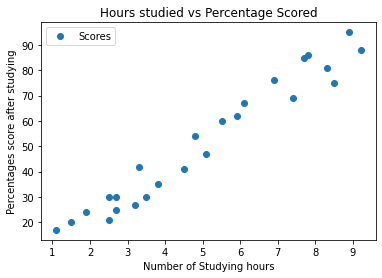

In [8]:
# Hours studied vs Percentage Scored

student_data.plot(x='Hours', y='Scores', style= "o")
plt.title('Hours studied vs Percentage Scored')
plt.xlabel('Number of Studying hours')
plt.ylabel('Percentages score after studying')
plt.show()

### Using plot() function of the pandas dataframe and pass it the column names for x coordinate and y coordinate,which are "Hours" and "Scores" respectively.
### From the graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the data

- The attributes are stored in the x variable. We specified "-1" as the range for columns since we wanted our attribute set to contain all the columns except the last one, which is "Scores". Similarly the y variable contains the labels. We specified 1 for the label column since the index for "Scores" column is 1. Remember, the column indexes start with 0, with 1 being the second column. In the next section, we will see a better way to specify columns for attributes and labels. 

In [9]:
x = student_data.iloc[:,:-1].values
y = student_data.iloc[:,1].values

- Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

- The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

## Training the Algorithm 

In [11]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

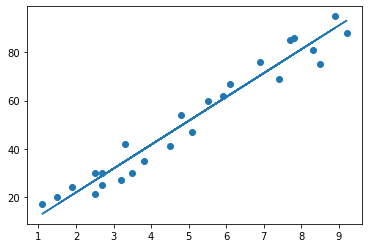

In [12]:
# Plotting the regression line
l1 = regressor.coef_*x + regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, l1);
plt.show()

In [13]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434683
[9.91065648]


- This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.
 

## Making the predictions

In [15]:
y_pred = regressor.predict(x_test)
print (y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


- The y_pred is a numpy array that contains all the predicted values for the input values in the x_test series.

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


- Though our model is not very precise, the predicted percentages are close to the actual ones.

# Predict the percentage of an student based on the no. of study hours.

# Problem Statement-
### What will be predicted score if a student studies for 9.25 hrs/ day?

In [17]:
hours = 9.25
prediction = regressor.predict([[hours]])
print("No of study Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

No of study Hours = 9.25
Predicted Score = 93.69173248737538


- If student studies for 9.25 hrs/day then he/she will score around 94% 

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


- You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.